In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [52]:
data = pd.read_csv('data/raw_coordinates.txt', sep='\t')

In [53]:
data

,Id,Cultivar,RawCoord1,RawCoord2,RawCoord3,RawCoord4,RawCoord5,RawCoord6,RawCoord7,RawCoord8,...,RawCoord17,RawCoord18,RawCoord19,RawCoord20,RawCoord21,RawCoord22,RawCoord23,RawCoord24,RawCoord25,RawCoord26
0,1,Fr,-0.107060,0.302365,-0.043765,-0.303194,0.150788,0.297623,-0.183509,0.212267,...,0.081181,-0.276038,0.171228,-0.183809,0.239935,-0.054884,0.261457,0.085816,0.222029,0.199102
1,2,Fr,-0.078265,0.316076,-0.044971,-0.321985,0.126065,0.298730,-0.151797,0.220278,...,0.076402,-0.284889,0.165865,-0.183911,0.232688,-0.047941,0.249199,0.096149,0.204247,0.207747
2,3,Fr,-0.085017,0.297562,-0.056781,-0.309981,0.140202,0.318078,-0.167134,0.208089,...,0.072459,-0.289701,0.165713,-0.186963,0.245765,-0.052562,0.255675,0.096455,0.201534,0.216055
3,4,Fr,-0.077393,0.313264,-0.045949,-0.321746,0.121797,0.309324,-0.161015,0.225776,...,0.077239,-0.286195,0.171168,-0.186981,0.246732,-0.061465,0.242042,0.084444,0.186239,0.205576
4,5,Fr,-0.072001,0.307274,-0.052782,-0.327913,0.137427,0.320371,-0.146519,0.206527,...,0.063121,-0.296466,0.150161,-0.187751,0.227213,-0.045168,0.245820,0.108045,0.203917,0.226438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,126,Ma,-0.074934,0.282847,-0.083129,-0.307155,0.076499,0.295627,-0.140268,0.204081,...,0.072738,-0.305627,0.190814,-0.200456,0.275154,-0.048742,0.266091,0.119440,0.194476,0.236702
709,127,Ma,-0.078152,0.299838,-0.075591,-0.310543,0.091272,0.312784,-0.139212,0.210592,...,0.072704,-0.305113,0.183377,-0.208339,0.252877,-0.055845,0.249054,0.113971,0.192934,0.238169
710,128,Ma,-0.067049,0.285218,-0.074236,-0.312967,0.092068,0.293127,-0.148986,0.211221,...,0.074291,-0.284840,0.189196,-0.182966,0.268341,-0.040624,0.273035,0.107568,0.194655,0.215506
711,129,Ma,-0.079253,0.279182,-0.088587,-0.298942,0.112360,0.312039,-0.153711,0.191165,...,0.064732,-0.287237,0.184639,-0.190067,0.266935,-0.042994,0.274344,0.115940,0.209101,0.232374


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          713 non-null    int64  
 1   Cultivar    713 non-null    object 
 2   RawCoord1   713 non-null    float64
 3   RawCoord2   713 non-null    float64
 4   RawCoord3   713 non-null    float64
 5   RawCoord4   713 non-null    float64
 6   RawCoord5   713 non-null    float64
 7   RawCoord6   713 non-null    float64
 8   RawCoord7   713 non-null    float64
 9   RawCoord8   713 non-null    float64
 10  RawCoord9   713 non-null    float64
 11  RawCoord10  713 non-null    float64
 12  RawCoord11  713 non-null    float64
 13  RawCoord12  713 non-null    float64
 14  RawCoord13  713 non-null    float64
 15  RawCoord14  713 non-null    float64
 16  RawCoord15  713 non-null    float64
 17  RawCoord16  713 non-null    float64
 18  RawCoord17  713 non-null    float64
 19  RawCoord18  713 non-null    f

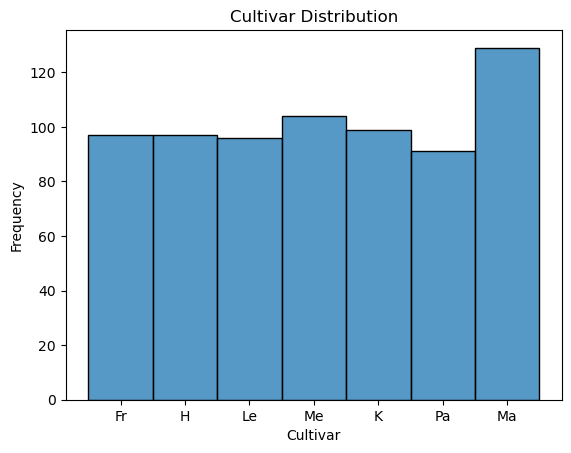

In [55]:
sns.histplot(data['Cultivar'])
plt.title("Cultivar Distribution")
plt.xlabel("Cultivar")               
plt.ylabel("Frequency")          
plt.savefig('fig_all/cultivar_distribution.png', dpi=300)
plt.show()


In [56]:
coords = data[data.columns[2:]].to_numpy()

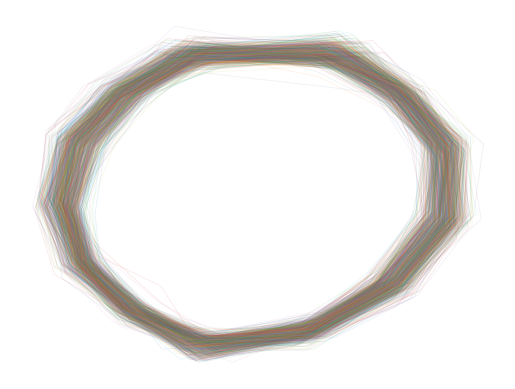

In [60]:
coords = coords.reshape(713, 13, 2)
new_order = [0, 2, 12, 11, 10, 9, 8, 1, 7, 6, 5, 4, 3] #landmarks order

coords_reordered = coords[:, new_order, :]


for i in range(coords_reordered.shape[0]):
    pts = coords_reordered[i]
    
    # cerrar el lazo
    closed = np.vstack([pts, pts[0]])  
    
    plt.plot(closed[:,0], closed[:,1], linewidth=0.6, alpha=0.1)
    plt.axis(False)
